#### Prepare the data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/bike_dataset_new.csv',parse_dates=['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weekday,day,year,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,1,2011,morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,1,2011,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,1,2011,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,1,2011,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,1,2011,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,31,2012,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,31,2012,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,31,2012,night
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,31,2012,night


#### Check the number of weather types

In [4]:
# Print out the unique values in the weather column
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

#### Create a dataframe with weather related data only ('temp', 'atemp', 'humidity', 'windspeed')

In [5]:
# Create a subset of the dataframe with only given columns
df_weather = df[['temp', 'atemp', 'humidity', 'windspeed', 'weather']]
df_weather

,temp,atemp,humidity,windspeed,weather
0,9.84,14.395,81,0.0000,1
1,9.02,13.635,80,0.0000,1
2,9.02,13.635,80,0.0000,1
3,9.84,14.395,75,0.0000,1
4,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
17374,10.66,12.880,60,11.0014,2
17375,10.66,12.880,60,11.0014,2
17376,10.66,12.880,60,11.0014,1
17377,10.66,13.635,56,8.9981,1


#### Check the data distribution and standardize it if needed

In [6]:
# Run describe method on the new dataframe that was just created
df_weather.describe()

,temp,atemp,humidity,windspeed,weather
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540,1.425283
std,7.894801,8.592511,19.292983,8.196795,0.639357
min,0.820000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,48.000000,7.001500,1.000000
50%,20.500000,24.240000,63.000000,12.998000,1.000000
75%,27.060000,31.060000,78.000000,16.997900,2.000000
max,41.000000,50.000000,100.000000,56.996900,4.000000


In [7]:
# Standardize the data due to the difference in magnitude 
scaler = StandardScaler()
scaler.fit(df_weather)
df_weather_scaled = scaler.transform(df_weather)
df_weather_scaled

array([[-1.33464759, -1.0932806 ,  0.9473725 , -1.55388851, -0.66519285],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851, -0.66519285],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851, -0.66519285],
       ...,
       [-1.23077877, -1.26960201, -0.14113744, -0.21169121, -0.66519285],
       [-1.23077877, -1.18173227, -0.34847267, -0.45609864, -0.66519285],
       [-1.23077877, -1.18173227,  0.11803159, -0.45609864, -0.66519285]])

- df_weather_scaled contains the standardized version of the original data, where each feature has been transformed to have a mean of 0 and a standard deviation of 1.

In [8]:
# Transform scaled data into a dataframe
df_weather = pd.DataFrame(df_weather_scaled, columns=df_weather.columns)
df_weather

,temp,atemp,humidity,windspeed,weather
0,-1.334648,-1.093281,0.947372,-1.553889,-0.665193
1,-1.438516,-1.181732,0.895539,-1.553889,-0.665193
2,-1.438516,-1.181732,0.895539,-1.553889,-0.665193
3,-1.334648,-1.093281,0.636370,-1.553889,-0.665193
4,-1.334648,-1.093281,0.636370,-1.553889,-0.665193
...,...,...,...,...,...
17374,-1.230779,-1.269602,-0.141137,-0.211691,0.898924
17375,-1.230779,-1.269602,-0.141137,-0.211691,0.898924
17376,-1.230779,-1.269602,-0.141137,-0.211691,-0.665193
17377,-1.230779,-1.181732,-0.348473,-0.456099,-0.665193


In [9]:
df_weather.describe()

,temp,atemp,humidity,windspeed,weather
count,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04
mean,-1.962486e-17,-1.962486e-16,2.943730e-17,1.578166e-16,-2.453108e-17
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-2.768625e+00,-3.251166e+00,-1.553889e+00,-6.651929e-01
25%,-8.153035e-01,-8.290895e-01,-7.631431e-01,-6.996886e-01,-6.651929e-01
50%,1.564696e-02,5.251758e-02,1.436398e-02,3.189880e-02,-6.651929e-01
75%,8.465975e-01,8.462549e-01,7.918711e-01,5.198962e-01,8.989239e-01
max,2.612367e+00,3.050563e+00,1.932215e+00,5.399871e+00,4.027157e+00


#### Use the elbow method to determine the number of clusters

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\HP\miniconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\HP\miniconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\HP\miniconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\HP\miniconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>
C:\Users\HP\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silen

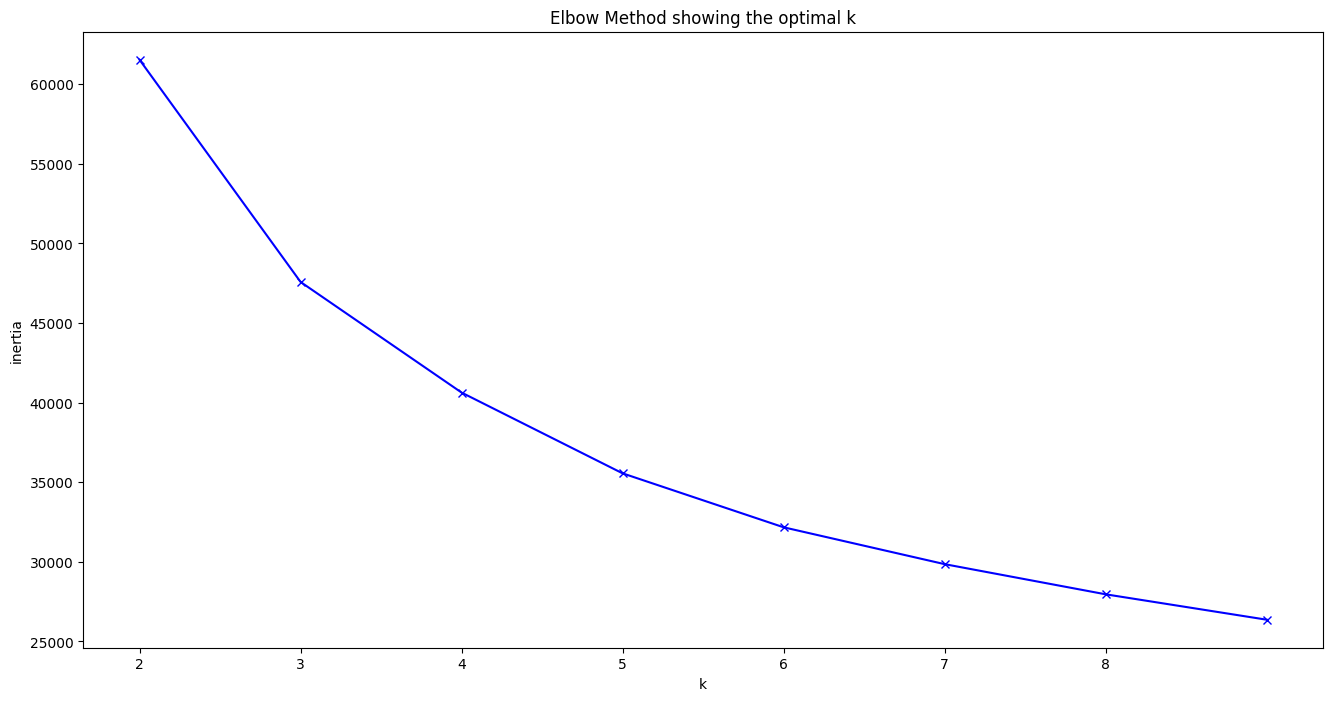

In [10]:
# Use the code from the encounter and adapt it to implement the elbow method
K = range(2, 10) #let's give it a range
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    n_init=10) # a different random state
    kmeans.fit(df_weather)
    inertia.append(kmeans.inertia_) #Inertia measures how well a dataset was clustered by K-Means

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # shows the x symbols on the graph
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k');

You should see a slight elbow for k = 4 which fits our knowledge of the dataset.

### Repeat k-means clustering with k = 4. Visualize the results and compare them with the weather from the `weather` column. Are the results aligned or rather different?

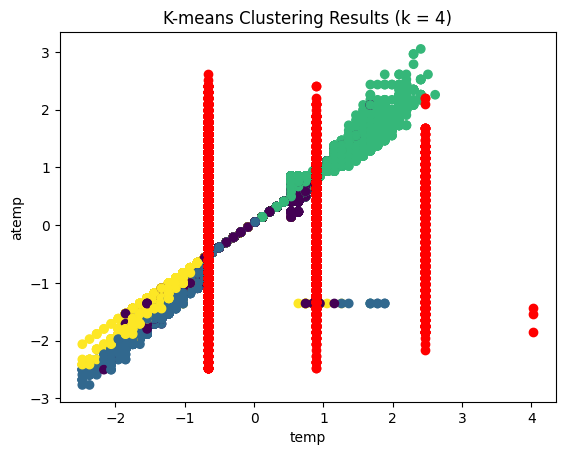

In [11]:
# Predict the labels and visualize the data. Adapt the code from the encounter.
# Note: in the encounter notebook we only visualize the data in a 2 dimensional space which means we are using only two columns (you can select column 1 - 'atemp' and column 2 - 'humidity')
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_weather)

#  Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Plot the data points with color-coded clusters
plt.scatter(df_weather['temp'], df_weather['atemp'], c=labels)
plt.scatter(df_weather['weather'], df_weather['temp'], color = "red")

plt.xlabel('temp')
plt.ylabel('atemp')
plt.title('K-means Clustering Results (k = 4)')
plt.show()

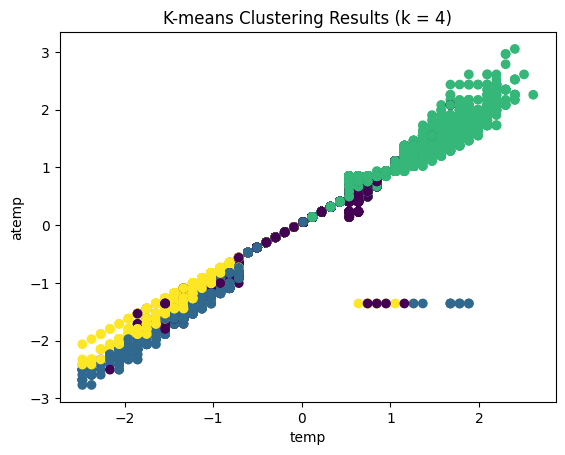

In [12]:
# Add weather information to the plot
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_weather)

#  Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Plot the data points with color-coded clusters
plt.scatter(df_weather['temp'], df_weather['atemp'], c=labels)

plt.xlabel('temp')
plt.ylabel('atemp')
plt.title('K-means Clustering Results (k = 4)')
plt.show()

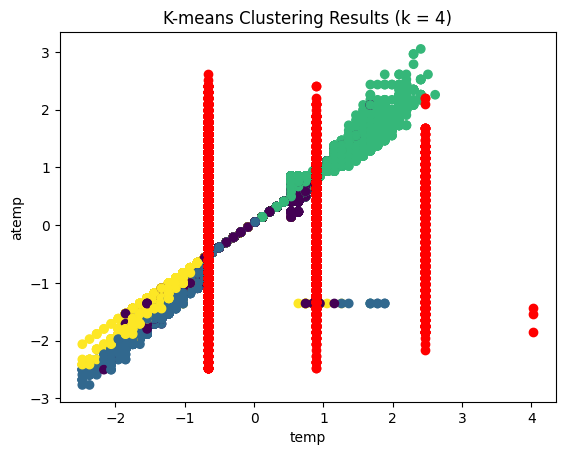

In [13]:
# Add weather information to the plot
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_weather)

#  Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Plot the data points with color-coded clusters
plt.scatter(df_weather['temp'], df_weather['atemp'], c=labels)
plt.scatter(df_weather['weather'], df_weather['temp'], color = "red")

plt.xlabel('temp')
plt.ylabel('atemp')
plt.title('K-means Clustering Results (k = 4)')
plt.show()

#### Conclusions:

Write down your thoughts here.